In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [14]:
data = pd.read_csv('malaysia_parcel_volumes.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date',inplace=True)

In [15]:
X_lr = data.index.to_series().apply(lambda x:x.toordinal()).values.reshape(-1,1)
y_lr = data['Parcel Volume'].values
regression_lr = LinearRegression()
regression_lr.fit(X_lr,y_lr)
y_lr_pred = regression_lr.predict(X_lr)

In [16]:
model_arima = ARIMA(data['Parcel Volume'], order=(2,0,2))
model_fit = model_arima.fit()
predictions_arima = model_fit.predict(start='2017-01-01',end='2018-12-01')

C:\Users\admin\anaconda3.1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3.1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3.1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3.1\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [17]:
X_rf = data.index.astype('int64').values.reshape(-1,1)
y_rf = data['Parcel Volume'].values

In [18]:
rf_model = RandomForestRegressor(n_estimators=100,random_state=42)
rf_model.fit(X_rf,y_rf)

RandomForestRegressor(random_state=42)

In [19]:
predictions_rf = rf_model.predict(X_rf)

In [20]:
data_prophet = data.reset_index().rename(columns={'Date': 'ds', 'Parcel Volume': 'y'})
model_prophet = Prophet()
model_prophet.fit(data_prophet)
future_dates =model_prophet.make_future_dataframe(periods=6,freq='M')
forecast = model_prophet.predict(future_dates)
predictions_prophet = forecast[['ds', 'yhat']].tail(5).round(0)

12:02:56 - cmdstanpy - INFO - Chain [1] start processing
12:02:57 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\admin\anaconda3.1\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


Linear Regression Predictions:
[1218.89133573 1209.1986966  1200.4440548 ]


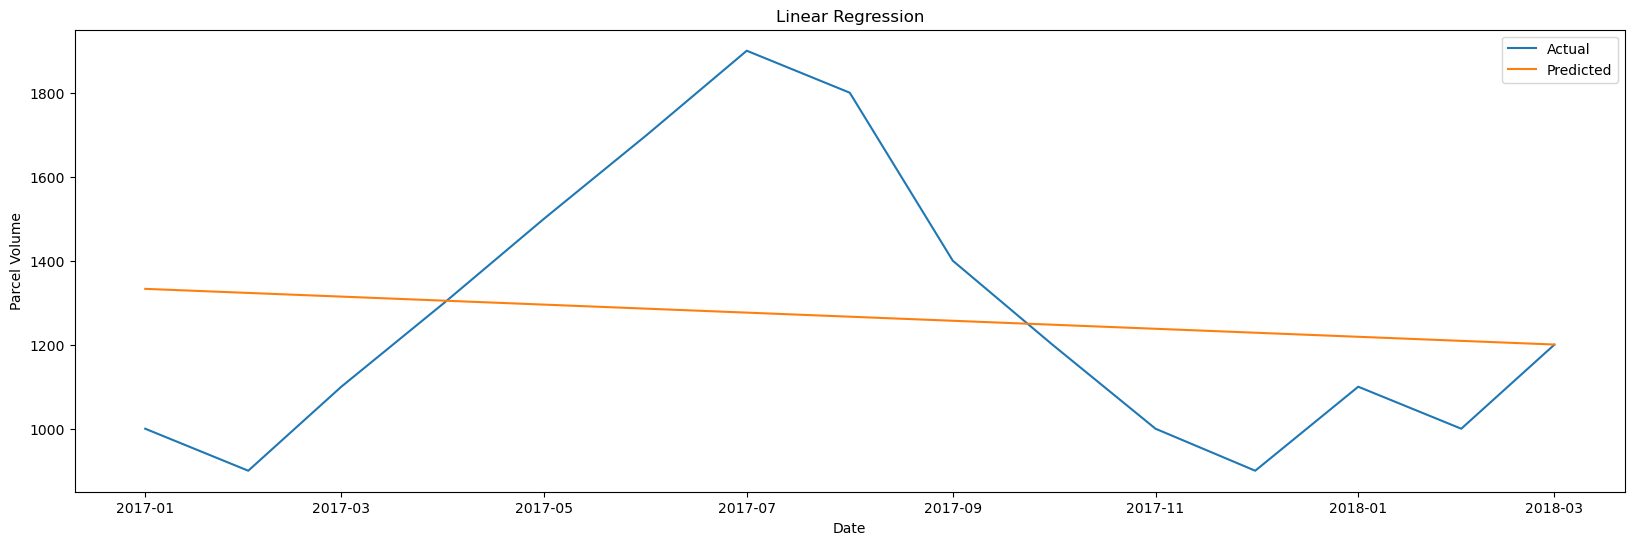

In [21]:
# Linear Regression
plt.figure(figsize=(20,6))
plt.plot(data.index, data['Parcel Volume'], label='Actual')
plt.plot(data.index, y_lr_pred, label='Predicted')
plt.title('Linear Regression')
plt.xlabel('Date')
plt.ylabel('Parcel Volume')
plt.legend()
# Linear Regression
y_lr_pred = regression_lr.predict(X_lr)
print("Linear Regression Predictions:")
print(y_lr_pred[-3:])  # Print last 3 predictions
plt.show()

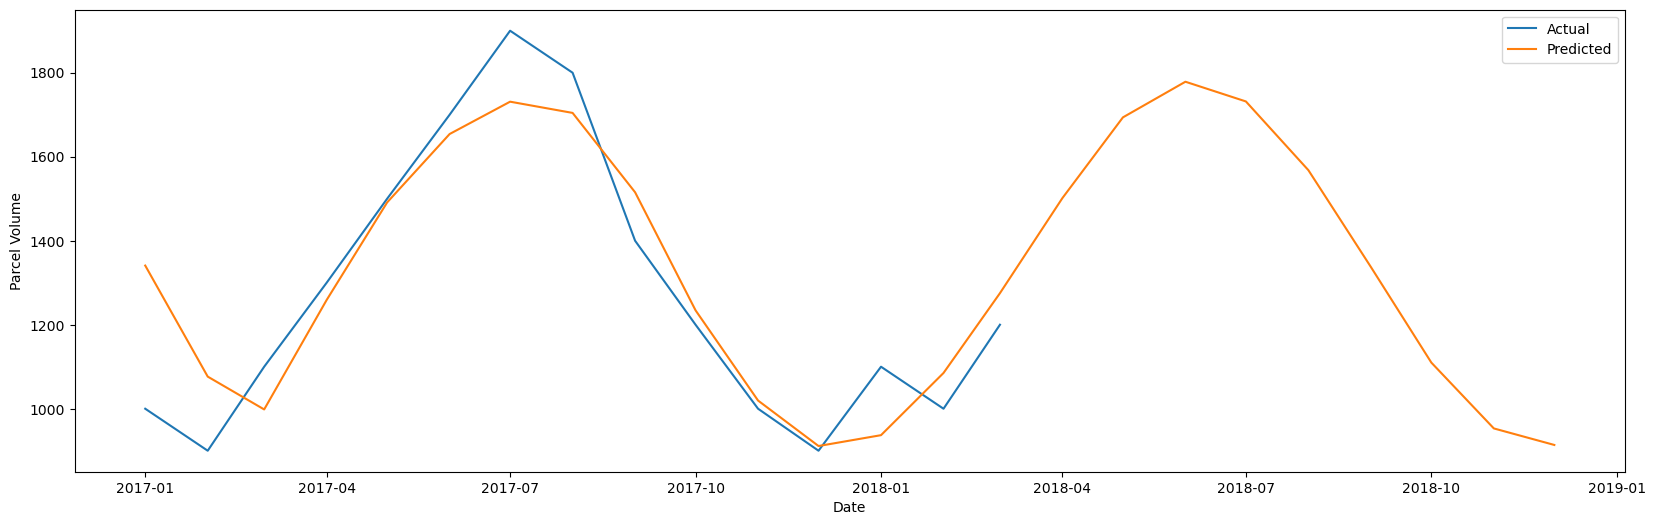

ARIMA Predictions:
2017-02-01    1076.460668
2017-03-01     998.300671
2017-04-01    1258.964814
2017-05-01    1491.188668
2017-06-01    1654.045910
2017-07-01    1731.045113
2017-08-01    1704.310231
2017-09-01    1515.386219
2017-10-01    1234.220695
2017-11-01    1019.472797
2017-12-01     911.194653
2018-01-01     937.030842
2018-02-01    1085.121184
2018-03-01    1275.160021
2018-04-01    1501.655933
2018-05-01    1693.699547
2018-06-01    1778.553877
2018-07-01    1731.612612
2018-08-01    1567.946724
2018-09-01    1337.485907
Freq: MS, Name: predicted_mean, dtype: float64


In [22]:
# ARIMA
plt.figure(figsize=(20,6))
plt.plot(data['Parcel Volume'], label='Actual')
plt.plot(predictions_arima, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Parcel Volume')
plt.legend()
plt.show()
# ARIMA
predictions_arima = model_fit.predict(start='2017-01-01', end='2018-09-01')
print("ARIMA Predictions:")
print(predictions_arima[1:])  # Print last 3 predictions
plt.show()

Random Forest Regressor Predictions:
[ 937. 1044. 1050. 1120.]


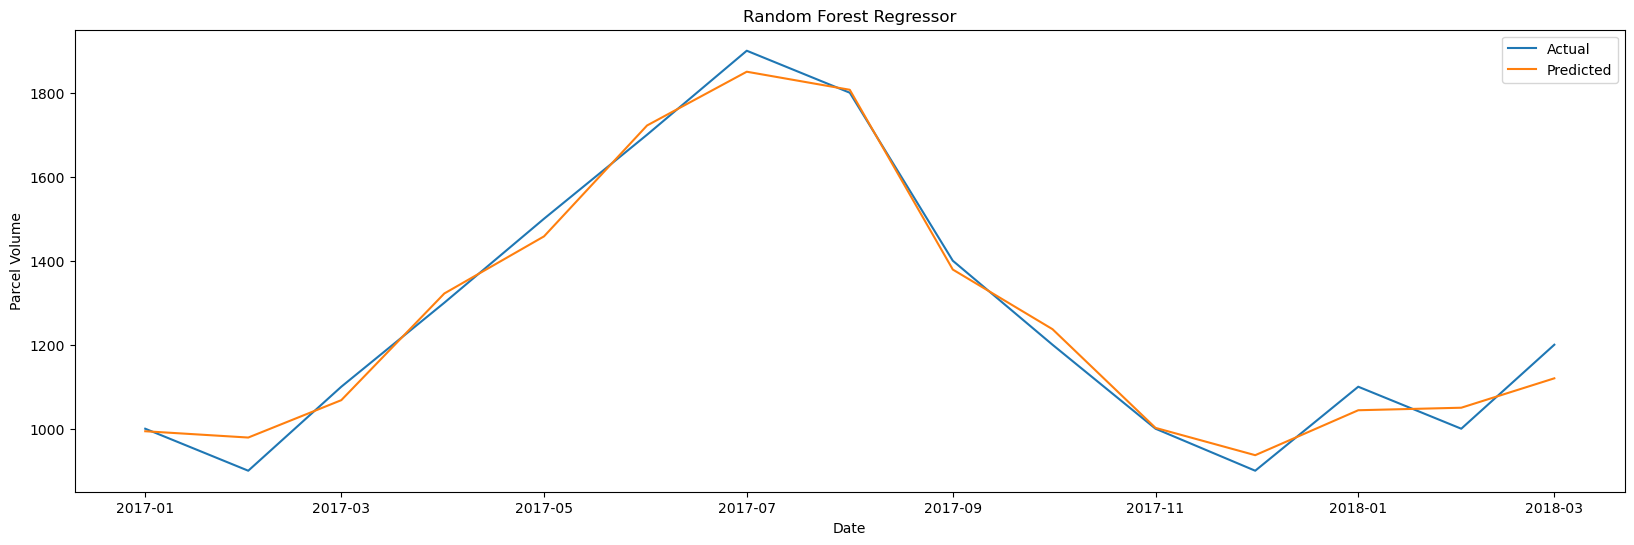

In [23]:
# Random Forest Regressor
plt.figure(figsize=(20,6))
plt.plot(data.index, data['Parcel Volume'], label='Actual')
plt.plot(data.index, predictions_rf, label='Predicted')
plt.title('Random Forest Regressor')
plt.xlabel('Date')
plt.ylabel('Parcel Volume')
plt.legend()
# Random Forest Regressor
predictions_rf = rf_model.predict(X_rf)
print("Random Forest Regressor Predictions:")
print(predictions_rf[-4:])  # Print last 3 predictions
plt.show()

Prophet Predictions:
18    1164.0
19    1155.0
20    1145.0
Name: yhat, dtype: float64


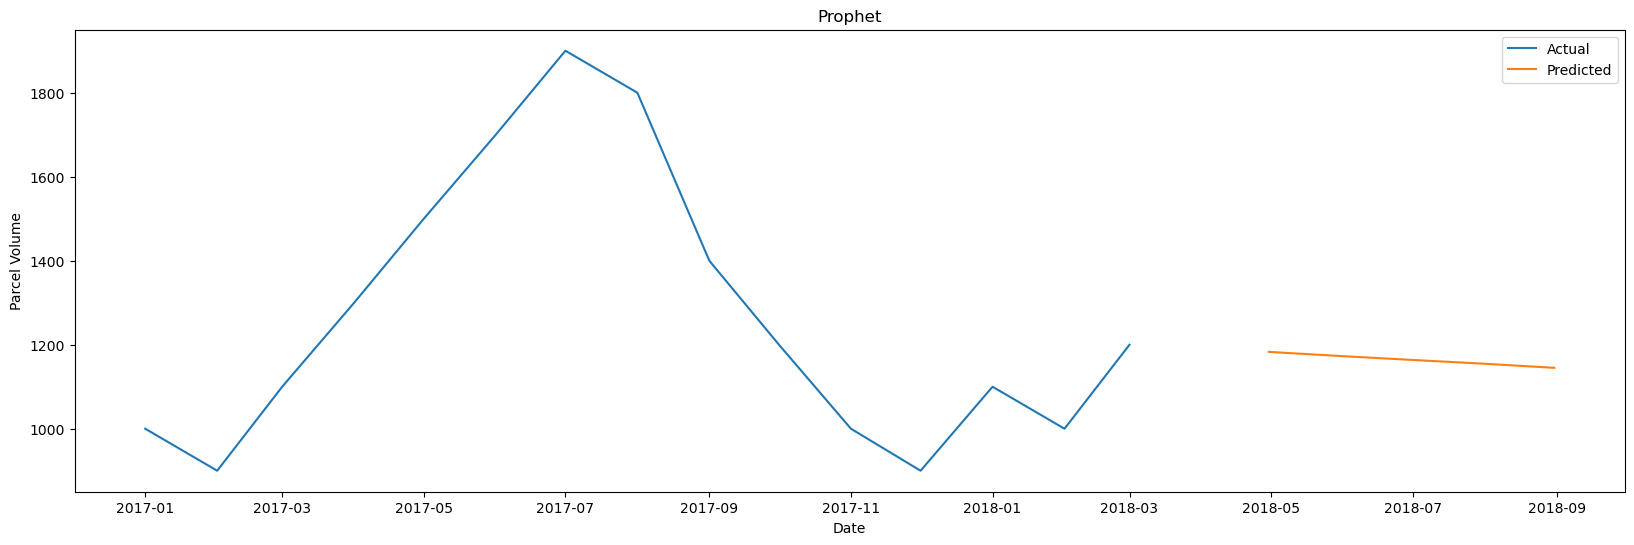

In [24]:
# Prophet
plt.figure(figsize=(20,6))
plt.plot(data_prophet['ds'], data_prophet['y'], label='Actual')
plt.plot(predictions_prophet['ds'], predictions_prophet['yhat'], label='Predicted')
plt.title('Prophet')
plt.xlabel('Date')
plt.ylabel('Parcel Volume')
plt.legend()
# Prophet
predictions_prophet = forecast[['ds', 'yhat']].tail(-3).round(0)
print("Prophet Predictions:")
print(predictions_prophet['yhat'].tail(3))  # Print last 3 predictions
plt.show()